In [1]:
# This file shows the fundamental concepts of 
# machine learning:
#   - loss function
#   - cost function
#   - linear regression
#.  - polynomial features
#   - training process

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# This function computes the L2 loss which is 
# ----------------------------------------
# [sum of (hypothesis(x_i) - y_i)^2] / (2*m)
# where hypothesis(x_i) == theta1(x_i^3) + theta2(x_i^2) + theta3(x_i) + b
# ----------------------------------------
# theta1: float, the parameter of x_i^3
# theta2: float, the parameter of x_i^2
# theta3: float, the parameter of x_i
# b     : float, the parameter that controls the amount of line shift
# x     : list, containing 21 data points
# y     : list, containing 21 data points
# return: float, the sum over all L2 losses of data points

def cost_function(theta1, theta2, theta3, b, x, y):
    return sum((theta1*x[i]**3+theta2*x[i]**2+theta3*x[i]+b-y[i])**2 for i in range(len(x))) / (2*len(x))
        

In [4]:
# Test for cost_function. You should see 0.14631688333333334
print(cost_function(0.1, 0.2, 0.3, -0.5, [0.3, 0.4, 0.5], [0.1, 0.2, 0.3]))

0.14631688333333334


In [5]:
def dJ_dtheta1(theta1, theta2, theta3, b, x, y):
    return sum((theta1*x[i]**3+theta2*x[i]**2+theta3*x[i]+b-y[i])*x[i]**3 for i in range(len(x))) / len(x)


In [6]:
# Test for dJ_dtheta1. You should see -0.040437
print(dJ_dtheta1(0.1, 0.2, 0.3, -0.5, [0.3, 0.4, 0.5], [0.1, 0.2, 0.3]))

-0.040437


In [7]:
def dJ_dtheta2(theta1, theta2, theta3, b, x, y):
    return sum((theta1*x[i]**3+theta2*x[i]**2+theta3*x[i]+b-y[i])*x[i]**2 for i in range(len(x))) / len(x)


In [8]:
# Test for dJ_dtheta2. You should see -0.09252266666666666
print(dJ_dtheta2(0.1, 0.2, 0.3, -0.5, [0.3, 0.4, 0.5], [0.1, 0.2, 0.3]))

-0.09252266666666666


In [9]:
def dJ_dtheta3(theta1, theta2, theta3, b, x, y):
    return sum((theta1*x[i]**3+theta2*x[i]**2+theta3*x[i]+b-y[i])*x[i] for i in range(len(x))) / len(x)


In [10]:
# Test for dJ_dtheta3. You should see -0.21906
print(dJ_dtheta3(0.1, 0.2, 0.3, -0.5, [0.3, 0.4, 0.5], [0.1, 0.2, 0.3]))

-0.21906


In [11]:
def dJ_db(theta1, theta2, theta3, b, x, y):
    return sum((theta1*x[i]**3+theta2*x[i]**2+theta3*x[i]+b-y[i]) for i in range(len(x))) / len(x)

In [12]:
# Test for dJ_db. You should see -0.5394666666666666
print(dJ_db(0.1, 0.2, 0.3, -0.5, [0.3, 0.4, 0.5], [0.1, 0.2, 0.3]))

-0.5394666666666666


In [13]:
# ---------- DO NOT EDIT THE CODE BELOW THIS LINE ---------- #

In [14]:
x = [6.1101,5.5277,8.5186,7.0032,5.8598,8.3829,7.4764,8.5781,6.4862,5.0546,5.7107,10.164,5.734,8.4084,5.6407,5.3794,6.3654,5.1301,6.4296,7.0708,6.1891]

In [15]:
y = [6.592,9.1302,13.662,11.854,6.8233,11.886,4.3483,12,6.5987,3.8166,3.2522,15.505,3.1551,7.2258,0.71618,3.5129,5.3048,0.56077,3.6518,5.3893,3.1386]

In [16]:
# ---------- Showing your data ---------- #

(0.0, 30.0)

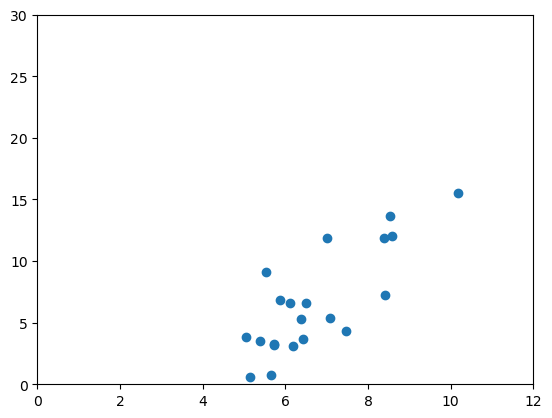

In [17]:
plt.scatter(x, y)
axes = plt.gca()
axes.set_xlim([0,12])
axes.set_ylim([0,30])

In [18]:
# Please perform feature scaling (normalization) by: 
# subtracting min(x) from each data point and dividing the result with (max(x)-min(x))
x = list((x[i]-min(x)) / (max(x)-min(x)) for i in range(len(x)))
y = list((y[i]-min(y)) / (max(y)-min(y)) for i in range(len(y)))

In [19]:
print(x[10])         # You should see 0.12841038086663803
print(y[10])         # You should see 0.18009827204211928

0.12841038086663803
0.18009827204211928


(0.0, 2.0)

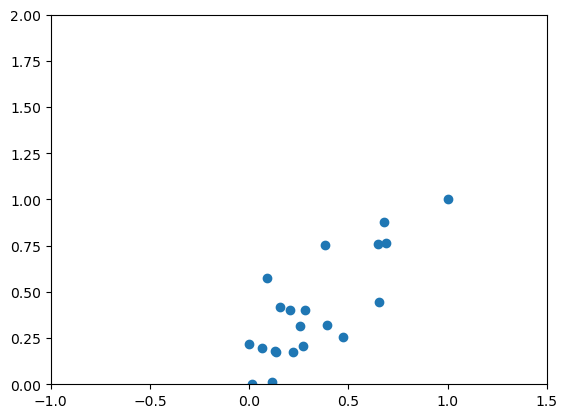

In [20]:
plt.scatter(x, y)
axes = plt.gca()
axes.set_xlim([-1,1.5])
axes.set_ylim([0,2])

In [21]:
# ------------ Initialize your theta ------------ #
# -----------  Choose from -1 to +1 ------------ #

In [22]:
theta1 = 0.5
theta2 = 0.5
theta3 = 0.5
b = 0.5


In [24]:
# which value is appropriate for alpha?
# Try 0.001, 0.01, 0.1

In [25]:
alpha = 0.1

In [26]:
# ---------- Training process ---------- #
# ---- 50 iterations over all data ----- # 

In [27]:
# Remember to append updated theta1, theta2, theta3, b, and cost.

theta1_history = []
theta2_history = []
theta3_history = []
b_history = []
cost_history = []
for i in range(50):
    # G.D.
    theta1 = theta1 - alpha * dJ_dtheta1(theta1, theta2, theta3, b, x, y)
    theta2 = theta2 - alpha * dJ_dtheta2(theta1, theta2, theta3, b, x, y)
    theta3 = theta3 - alpha * dJ_dtheta3(theta1, theta2, theta3, b, x, y)
    b = b - alpha * dJ_db(theta1, theta2, theta3, b, x, y)
    
    theta1_history.append(theta1)
    theta2_history.append(theta2)
    theta3_history.append(theta3)
    b_history.append(b)
    
    cost = cost_function(theta1, theta2, theta3, b, x, y)
    cost_history.append(cost)


In [29]:
# Pay attention to the trend of cost. 
# Is is rising? If it is, why?

print(cost_history)

[0.08823806894113118, 0.07276930988298715, 0.060651989869899205, 0.051156476904333864, 0.0437121331328076, 0.037872658244002, 0.03328898815602728, 0.029688101779563006, 0.026856447787285513, 0.024626984157095883, 0.022869042861183533, 0.02148040379603841, 0.02038109633018858, 0.01950855185035771, 0.0188138127965594, 0.018258567884127646, 0.017812833419175538, 0.01745313987574449, 0.01716111360470386, 0.016922367552637915, 0.0167256336429257, 0.016562084152189984, 0.016424800895648, 0.016308360012453595, 0.016208507162544503, 0.016121903436494483, 0.016045926573079242, 0.015978515436613373, 0.015918048331627712, 0.015863247785680778, 0.015813106036791785, 0.015766826717708245, 0.01572377921126723, 0.01568346291913585, 0.01564547928687317, 0.01560950989802635, 0.015575299317385397, 0.015542641650883376, 0.015511370014388756, 0.015481348279436364, 0.015452464601452756, 0.015424626343594525, 0.015397756093458519, 0.01537178853574522, 0.0153466679954501, 0.01532234650644466, 0.0152987822918

theta1: 0.4917926582684316, theta2: 0.48934777337730434, theta3: 0.4834999712880121, b: 0.4599292988390872


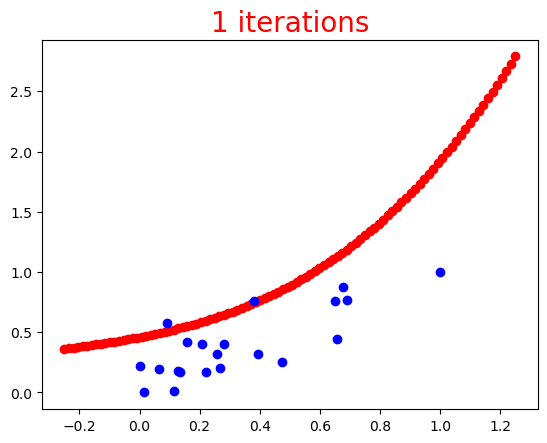

In [31]:
theta1 = theta1_history[0]
theta2 = theta2_history[0]
theta3 = theta3_history[0]
b = b_history[0]

print(f'theta1: {theta1}, theta2: {theta2}, theta3: {theta3}, b: {b}')

x_plot = np.linspace(-0.25, 1.25, 100)
y_plot = theta1*(x_plot**3)+theta2*(x_plot**2)+theta3*(x_plot)+b


plt.scatter(x_plot, y_plot, color='red')
plt.scatter(x, y, color='blue')


# show the plot
plt.title("1 iterations", color='red', fontdict = {'fontsize': 20})
plt.show()

theta1: 0.4438167796002018, theta2: 0.42926609118643555, theta3: 0.39511893239052903, b: 0.25847220543301397


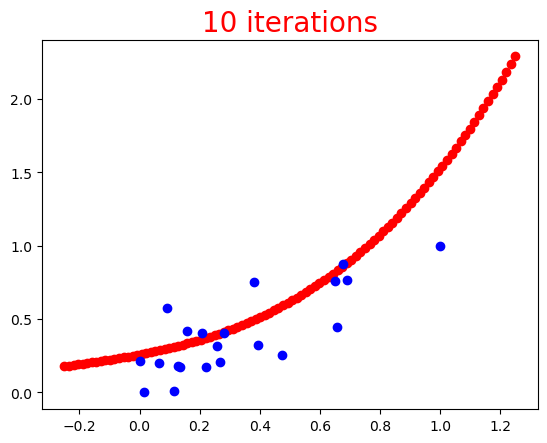

In [32]:
theta1 = theta1_history[9]
theta2 = theta2_history[9]
theta3 = theta3_history[9]
b = b_history[9]

print(f'theta1: {theta1}, theta2: {theta2}, theta3: {theta3}, b: {b}')

x_plot = np.linspace(-0.25, 1.25, 100)
y_plot = theta1*(x_plot**3)+theta2*(x_plot**2)+theta3*(x_plot)+b


plt.scatter(x_plot, y_plot, color='red')
plt.scatter(x, y, color='blue')


# show the plot
plt.title("10 iterations", color='red', fontdict = {'fontsize': 20})
plt.show()

theta1: 0.41739646643660633, theta2: 0.399385471100846, theta3: 0.3581227731391351, b: 0.19358741249852676


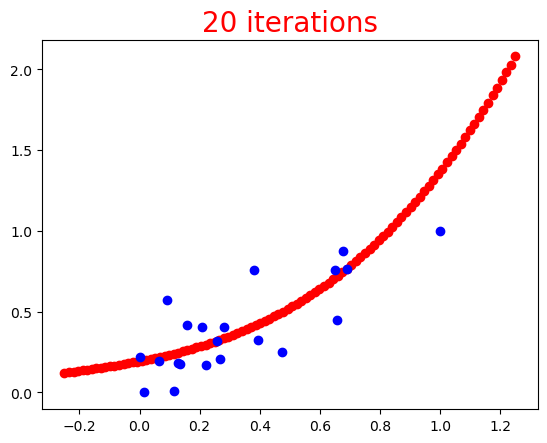

In [33]:
theta1 = theta1_history[19]
theta2 = theta2_history[19]
theta3 = theta3_history[19]
b = b_history[19]

print(f'theta1: {theta1}, theta2: {theta2}, theta3: {theta3}, b: {b}')

x_plot = np.linspace(-0.25, 1.25, 100)
y_plot = theta1*(x_plot**3)+theta2*(x_plot**2)+theta3*(x_plot)+b


plt.scatter(x_plot, y_plot, color='red')
plt.scatter(x, y, color='blue')


# show the plot
plt.title("20 iterations", color='red', fontdict = {'fontsize': 20})
plt.show()

In [34]:
# ---------- Plot the errors over the training process ---------- #

theta1: 0.4008431158839503, theta2: 0.38269403100178584, theta3: 0.3421256482114995, b: 0.17949036128937237


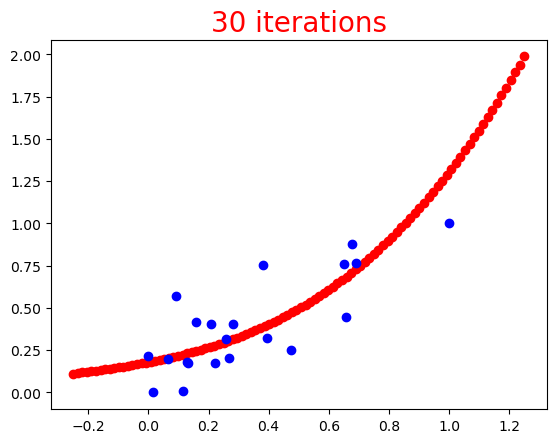

In [35]:
theta1 = theta1_history[29]
theta2 = theta2_history[29]
theta3 = theta3_history[29]
b = b_history[29]

print(f'theta1: {theta1}, theta2: {theta2}, theta3: {theta3}, b: {b}')

x_plot = np.linspace(-0.25, 1.25, 100)
y_plot = theta1*(x_plot**3)+theta2*(x_plot**2)+theta3*(x_plot)+b


plt.scatter(x_plot, y_plot, color='red')
plt.scatter(x, y, color='blue')


# show the plot
plt.title("30 iterations", color='red', fontdict = {'fontsize': 20})
plt.show()

theta1: 0.38817752129051447, theta2: 0.37092881794821064, theta3: 0.33325574396441104, b: 0.17950774335999473


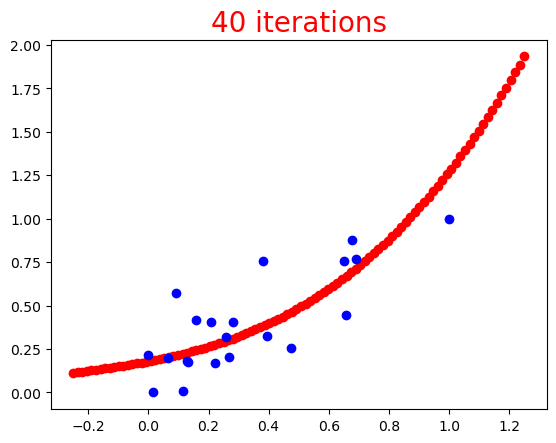

In [36]:
theta1 = theta1_history[39]
theta2 = theta2_history[39]
theta3 = theta3_history[39]
b = b_history[39]

print(f'theta1: {theta1}, theta2: {theta2}, theta3: {theta3}, b: {b}')

x_plot = np.linspace(-0.25, 1.25, 100)
y_plot = theta1*(x_plot**3)+theta2*(x_plot**2)+theta3*(x_plot)+b


plt.scatter(x_plot, y_plot, color='red')
plt.scatter(x, y, color='blue')


# show the plot
plt.title("40 iterations", color='red', fontdict = {'fontsize': 20})
plt.show()

Text(0.5, 1.0, 'Errors over iterations')

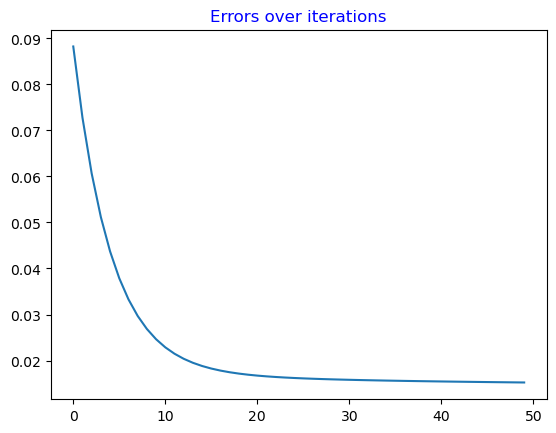

In [37]:
cost_x = list(range(len(cost_history)))
cost_y = cost_history
plt.plot(cost_x, cost_y)
plt.title("Errors over iterations", color = 'blue')